In [40]:
from sklearn import datasets
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import roc_auc_score
from scipy.spatial.distance import euclidean
from functools import reduce
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.feature_extraction import DictVectorizer
from scipy.sparse import hstack
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import r2_score
from scipy.stats import logistic
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("gbm-data.csv")
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = df.Activity
X = df.drop("Activity", axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

In [34]:
def sigmoid_array(x):                                        
    return 1 / (1 + np.exp(-x))

1
      Iter       Train Loss   Remaining Time 
         1           1.0190           11.92s
         2           0.9192           11.06s
         3           0.8272            9.27s
         4           0.7834            8.05s
         5           0.7109            7.75s
         6           0.6368            8.16s
         7           0.5797            7.98s
         8           0.5610            7.43s
         9           0.5185            7.26s
        10           0.4984            6.90s
        20           0.1999            6.68s
        30           0.1313            5.98s
        40           0.0790            5.62s
        50           0.0511            5.23s
        60           0.0352            5.02s
        70           0.0245            4.71s
        80           0.0162            4.47s
        90           0.0114            4.22s
       100           0.0077            3.98s
       200           0.0004            1.19s
test: 0/0.5822942594278476 train: 180/0.000208576113

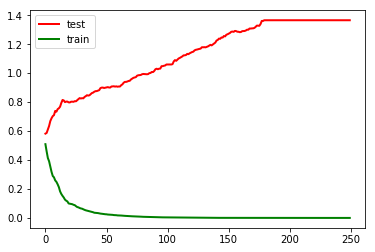

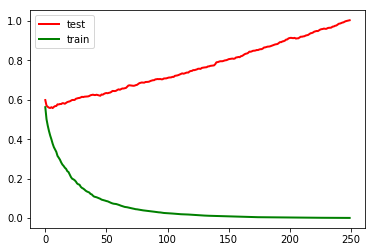

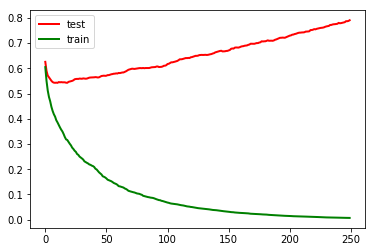

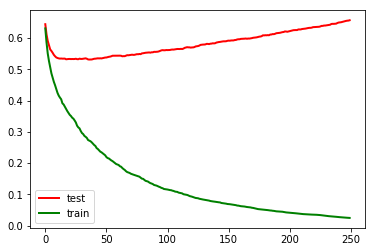

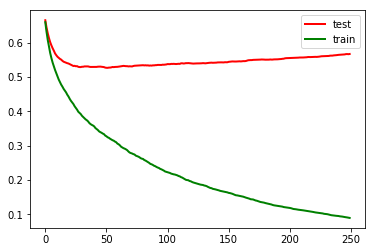

In [36]:
for learning_rate in [1, 0.5, 0.3, 0.2, 0.1]:
    print(learning_rate)
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=learning_rate)
    clf.fit(X_train, y_train)
    test_score = np.empty(len(clf.estimators_))
    train_score = np.empty(len(clf.estimators_))
    min_test_i = 0
    min_test_val = 1000
    for i, pred in enumerate(clf.staged_decision_function(X_test)):
        test_score[i] = log_loss(y_test, sigmoid_array(pred))
        if test_score[i] < min_test_val:
            min_test_val = test_score[i]
            min_test_i = i
    min_train_i = 0
    min_train_val = 1000
    for i, pred in enumerate(clf.staged_decision_function(X_train)):
        train_score[i] = log_loss(y_train, sigmoid_array(pred))
        if train_score[i] < min_train_val:
            min_train_val = train_score[i]
            min_train_i = i
    print(f"test: {min_test_i}/{min_test_val} train: {min_train_i}/{min_train_val}")
    plt.figure()
    plt.plot(test_score, 'r', linewidth=2)
    plt.plot(train_score, 'g', linewidth=2)
    plt.legend(['test', 'train'])

In [38]:
with open("gradient_boosting_1_res.txt", "w") as f:
    print("overfitting", file=f, end='')
with open("gradient_boosting_2_res.txt", "w") as f:
    print("0.53 36", file=f, end='')

In [43]:
clf = RandomForestClassifier(random_state=241, n_estimators=36)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=36, n_jobs=1,
            oob_score=False, random_state=241, verbose=0, warm_start=False)

In [45]:
pred = clf.predict_proba(X_test)
loss = log_loss(y_test, pred)
print(loss)

0.54138128618


In [47]:
with open("gradient_boosting_3_res.txt", "w") as f:
    print("%.2f" % (loss), file=f, end='')

In [49]:
clf2 = RandomForestClassifier(random_state=241, n_estimators=300)
clf2.fit(X_train, y_train)
pred = clf2.predict_proba(X_test)
loss = log_loss(y_test, pred)
print(loss)

0.524480988114
